In [1]:
%matplotlib inline
import pylab as plt
plt.style.use('fivethirtyeight')

In [2]:
import pandas as pd
# from ml import KNN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

In [3]:
path = 'https://raw.githubusercontent.com/Codecademy/datasets/master/streeteasy/queens.csv'
df = pd.read_csv(path)
df.head(3)

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,10234,3000,3.0,1,1000,4,1.0,106,0,0,0,0,0,0,0,0,Astoria,Queens
1,10524,1950,1.0,1,950,1,3.0,83,0,0,0,0,0,0,0,0,Forest Hills,Queens
2,5465,3500,1.0,1,996,9,7.0,3,1,0,0,0,0,0,0,0,Astoria,Queens


## Prepare Data

In [6]:
y = df.rent

In [4]:
X = df.drop('rent', axis=1).select_dtypes('number')

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=123)

/Users/philippk/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


# Fit Model

In [8]:
model = KNeighborsRegressor(n_neighbors=3)

In [9]:
model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=3, p=2,
          weights='uniform')

In [10]:
y_pred = model.predict(X_test)

In [11]:
# definitely correct and usually faster
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
for metric in  mean_absolute_error, mean_squared_error, r2_score:
     print(f'{metric.__name__}: {metric(y_pred, y_test)}')

mean_absolute_error: 640.3555555555556
mean_squared_error: 700313.1382716049
r2_score: -1.5599118899874753


In [12]:
df['rent'].std()

854.6123999140013

Наша модель работает ужасно... но почему?

- Существуют выбросы
- Данные не нормализированны
- Модель не умеет "убивать" глупые фичи

# Drop Id

In [13]:
X_train.drop('rental_id', axis=1, inplace=True)
X_test.drop('rental_id', axis=1, inplace=True)

/Users/philippk/anaconda3/envs/py36/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [14]:
model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=3, p=2,
          weights='uniform')

In [15]:
y_pred = model.predict(X_test)

In [16]:
# definitely correct and usually faster
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
for metric in  mean_absolute_error, mean_squared_error, r2_score:
     print(f'{metric.__name__}: {metric(y_pred, y_test)}')

mean_absolute_error: 352.58148148148143
mean_squared_error: 252517.56419753088
r2_score: 0.5450957824077073


# Scale

In [17]:
use_cols = [ 'bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee']

In [18]:
scaler = StandardScaler()

In [19]:
# X_train_s = scaler.fit_transform(X_train)
# X_test_s = scaler.fit_transform(X_test)

X_train_s = scaler.fit_transform(X_train[use_cols])
X_test_s = scaler.fit_transform(X_test[use_cols])

/Users/philippk/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/philippk/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/philippk/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/philippk/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [20]:
model.fit(X_train_s, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=3, p=2,
          weights='uniform')

In [21]:
y_pred = model.predict(X_test_s)

In [22]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
for metric in  mean_absolute_error, mean_squared_error, r2_score:
     print(f'{metric.__name__}: {metric(y_pred, y_test)}')

mean_absolute_error: 311.81851851851854
mean_squared_error: 243635.74691358022
r2_score: 0.5428204696087342


# Handling Categorical

In [51]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [61]:
# ?LabelEncoder

In [62]:
LE = LabelEncoder()
LE.fit(['Manhattan', 'Queens', 'Brooklyn'])

LabelEncoder()

In [75]:
OH = OneHotEncoder(handle_unknown='ignore')

In [86]:
# OH.fit_transform(df[['borough']])

## Using frequency as a feature 

In [23]:
df.reindex(X_train.index)['neighborhood'].value_counts()

Astoria                106
Long Island City        79
Rego Park               37
Forest Hills            28
Sunnyside               24
Ridgewood               17
Flushing                15
Kew Gardens             14
Briarwood                7
Elmhurst                 6
Jackson Heights          6
Jamaica Estates          4
Queens Village           3
Woodside                 3
Kew Gardens Hills        2
Rockaway All             1
Richmond Hill            1
Glendale                 1
Oakland Gardens          1
South Richmond Hill      1
North Corona             1
Corona                   1
Name: neighborhood, dtype: int64

In [24]:
nab_values = (df.reindex(X_train.index)['neighborhood'].value_counts() /  len(X_train)).to_dict()

In [25]:
nabs = df['neighborhood'].map(nab_values)

In [26]:
# nabs

In [27]:
X_train['neighborhood'] = nabs.reindex(X_train.index)
X_test['neighborhood'] = nabs.reindex(X_test.index).fillna(nabs.mean())  # некоторые районы не попали в трейн !

/Users/philippk/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/philippk/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [28]:
X_train_s = scaler.fit_transform(X_train[use_cols + ['neighborhood']] )
X_test_s = scaler.fit_transform(X_test[use_cols + ['neighborhood']])

/Users/philippk/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/philippk/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/philippk/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/philippk/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [29]:
model.fit(X_train_s, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=3, p=2,
          weights='uniform')

In [30]:
y_pred = model.predict(X_test_s)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
for metric in  mean_absolute_error, mean_squared_error, r2_score:
     print(f'{metric.__name__}: {metric(y_pred, y_test)}')

mean_absolute_error: 261.3074074074074
mean_squared_error: 174415.7074074074
r2_score: 0.6751730637604156


## Гиперпараметры

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
parameters = {'n_neighbors':range(1,11)}

In [35]:
cv = GridSearchCV(model, parameters, cv=5, iid=False)

In [36]:
cv.fit(X_train_s, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=3, p=2,
          weights='uniform'),
       fit_params=None, iid=False, n_jobs=None,
       param_grid={'n_neighbors': range(1, 11)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [37]:
cv_results = pd.DataFrame(cv.cv_results_).set_index(pd.Series(parameters['n_neighbors']))

/Users/philippk/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/philippk/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/philippk/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_

In [38]:
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
1,0.001436,0.000465,0.001676,0.000360,1,{'n_neighbors': 1},0.629691,0.388919,0.582123,0.721020,...,0.602612,0.117222,10,0.999212,0.999987,0.999585,0.999368,0.999806,0.999592,0.000282
2,0.000982,0.000152,0.001306,0.000203,2,{'n_neighbors': 2},0.639600,0.671219,0.550890,0.749405,...,0.658192,0.064526,6,0.914898,0.895920,0.900038,0.888779,0.891018,0.898130,0.009249
3,0.001190,0.000368,0.002198,0.000398,3,{'n_neighbors': 3},0.610832,0.774003,0.565974,0.785287,...,0.681133,0.086960,1,0.878772,0.818530,0.855571,0.845264,0.853058,0.850239,0.019394
4,0.001107,0.000149,0.001329,0.000091,4,{'n_neighbors': 4},0.608149,0.795168,0.620221,0.749117,...,0.678827,0.077711,2,0.844561,0.798094,0.824240,0.806260,0.832130,0.821057,0.016920
5,0.000890,0.000227,0.001223,0.000077,5,{'n_neighbors': 5},0.581131,0.788438,0.647633,0.788551,...,0.678025,0.093263,3,0.814731,0.763313,0.805496,0.795409,0.802383,0.796266,0.017608
6,0.000820,0.000100,0.001267,0.000185,6,{'n_neighbors': 6},0.569377,0.804196,0.622741,0.786395,...,0.670154,0.104218,4,0.790956,0.742127,0.781125,0.768791,0.782103,0.773021,0.016983
7,0.001012,0.000250,0.001163,0.000094,7,{'n_neighbors': 7},0.567359,0.799283,0.597692,0.796142,...,0.659647,0.114317,5,0.773516,0.719615,0.767983,0.746815,0.768497,0.755285,0.020061
8,0.000756,0.000118,0.001243,0.000335,8,{'n_neighbors': 8},0.568876,0.780500,0.619028,0.812871,...,0.655299,0.122404,7,0.769067,0.702297,0.747252,0.715785,0.749929,0.736866,0.024310
9,0.000684,0.000045,0.001208,0.000165,9,{'n_neighbors': 9},0.566213,0.785346,0.605682,0.817670,...,0.652703,0.127615,8,0.763130,0.682240,0.740572,0.701873,0.742757,0.726115,0.029559
10,0.000611,0.000074,0.001320,0.000585,10,{'n_neighbors': 10},0.567364,0.772155,0.590908,0.817123,...,0.649607,0.122904,9,0.753607,0.677909,0.734357,0.699767,0.736081,0.720344,0.027476


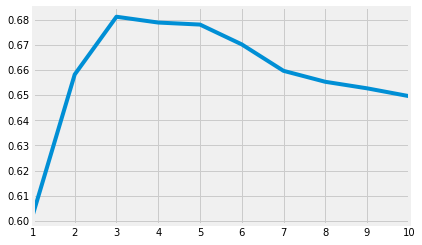

In [39]:
cv_results['mean_test_score'].plot()

In [41]:
cv.best_params_

{'n_neighbors': 3}

In [ ]:
cv.predict()